Step1: Reading and understanding the data

In [1046]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [1047]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1048]:
bike.shape

(730, 16)

In [1049]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1050]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1051]:
print(bike.columns)  #checking all columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [1052]:
bike.rename(columns={'season':'Season','yr':'Year','mnth':'Month','hum':'Humidity',
                     'weathersit':'Weather','cnt':'Count'}, inplace=True)

In [1053]:
bike.head()

,instant,dteday,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1054]:
count = bike.isnull().sum()
print(count)

instant       0
dteday        0
Season        0
Year          0
Month         0
holiday       0
weekday       0
workingday    0
Weather       0
temp          0
atemp         0
Humidity      0
windspeed     0
casual        0
registered    0
Count         0
dtype: int64


Step2: Exploratory Data Anlysis
Data Visualisation

In [1055]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   Season      730 non-null    int64  
 3   Year        730 non-null    int64  
 4   Month       730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   Weather     730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  Humidity    730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  Count       730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1056]:
bike.drop(['instant'],axis=1,inplace=True)
bike.head()

,dteday,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1057]:
bike.drop(['dteday'],axis=1,inplace=True)
bike.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1058]:
bike.drop(['casual','registered'],axis=1,inplace=True)
bike.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1059]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      730 non-null    int64  
 1   Year        730 non-null    int64  
 2   Month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   Weather     730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [1060]:
bike['Season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bike.head(10)

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [1061]:
bike['Weather'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
bike.head(10)

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,spring,0,1,0,6,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,4,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,5,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,6,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,0,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,1,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [1062]:
bike['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bike.head(10)

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,1,0,Thursday,1,Clear_Few Clouds,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,1,0,Friday,1,Mist_cloudy,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,1,0,Saturday,0,Mist_cloudy,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,1,0,Sunday,0,Clear_Few Clouds,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,1,0,Monday,1,Clear_Few Clouds,6.184153,7.54440,48.2917,14.958889,1321


In [1063]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   Weather     730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


In [1064]:
bike[['temp','atemp','Humidity','windspeed','Count']]=bike[['temp','atemp','Humidity','windspeed','Count']].apply(pd.to_numeric)

In [1065]:
bike.head()
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   Weather     730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


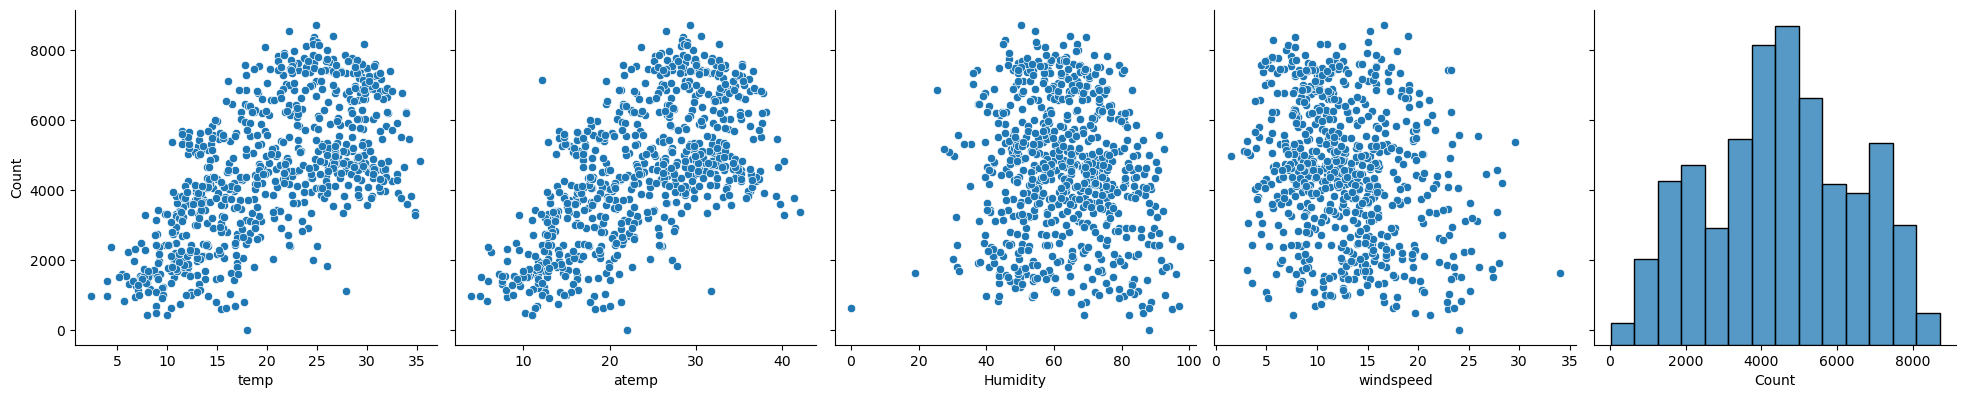

In [1066]:
#Performing EDA and understand numirical variables
sns.pairplot(bike, x_vars=['temp','atemp','Humidity','windspeed',"Count"], y_vars='Count', size=4, aspect=1, kind='scatter')
plt.show()

In [1067]:
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

ValueError: could not convert string to float: 'spring'

<Figure size 1600x1000 with 0 Axes>

In [1068]:
bike.drop(['temp'],axis=1,inplace=True)
bike.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,atemp,Humidity,windspeed,Count
0,spring,0,1,0,Saturday,0,Mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear_Few Clouds,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,11.46350,43.6957,12.522300,1600


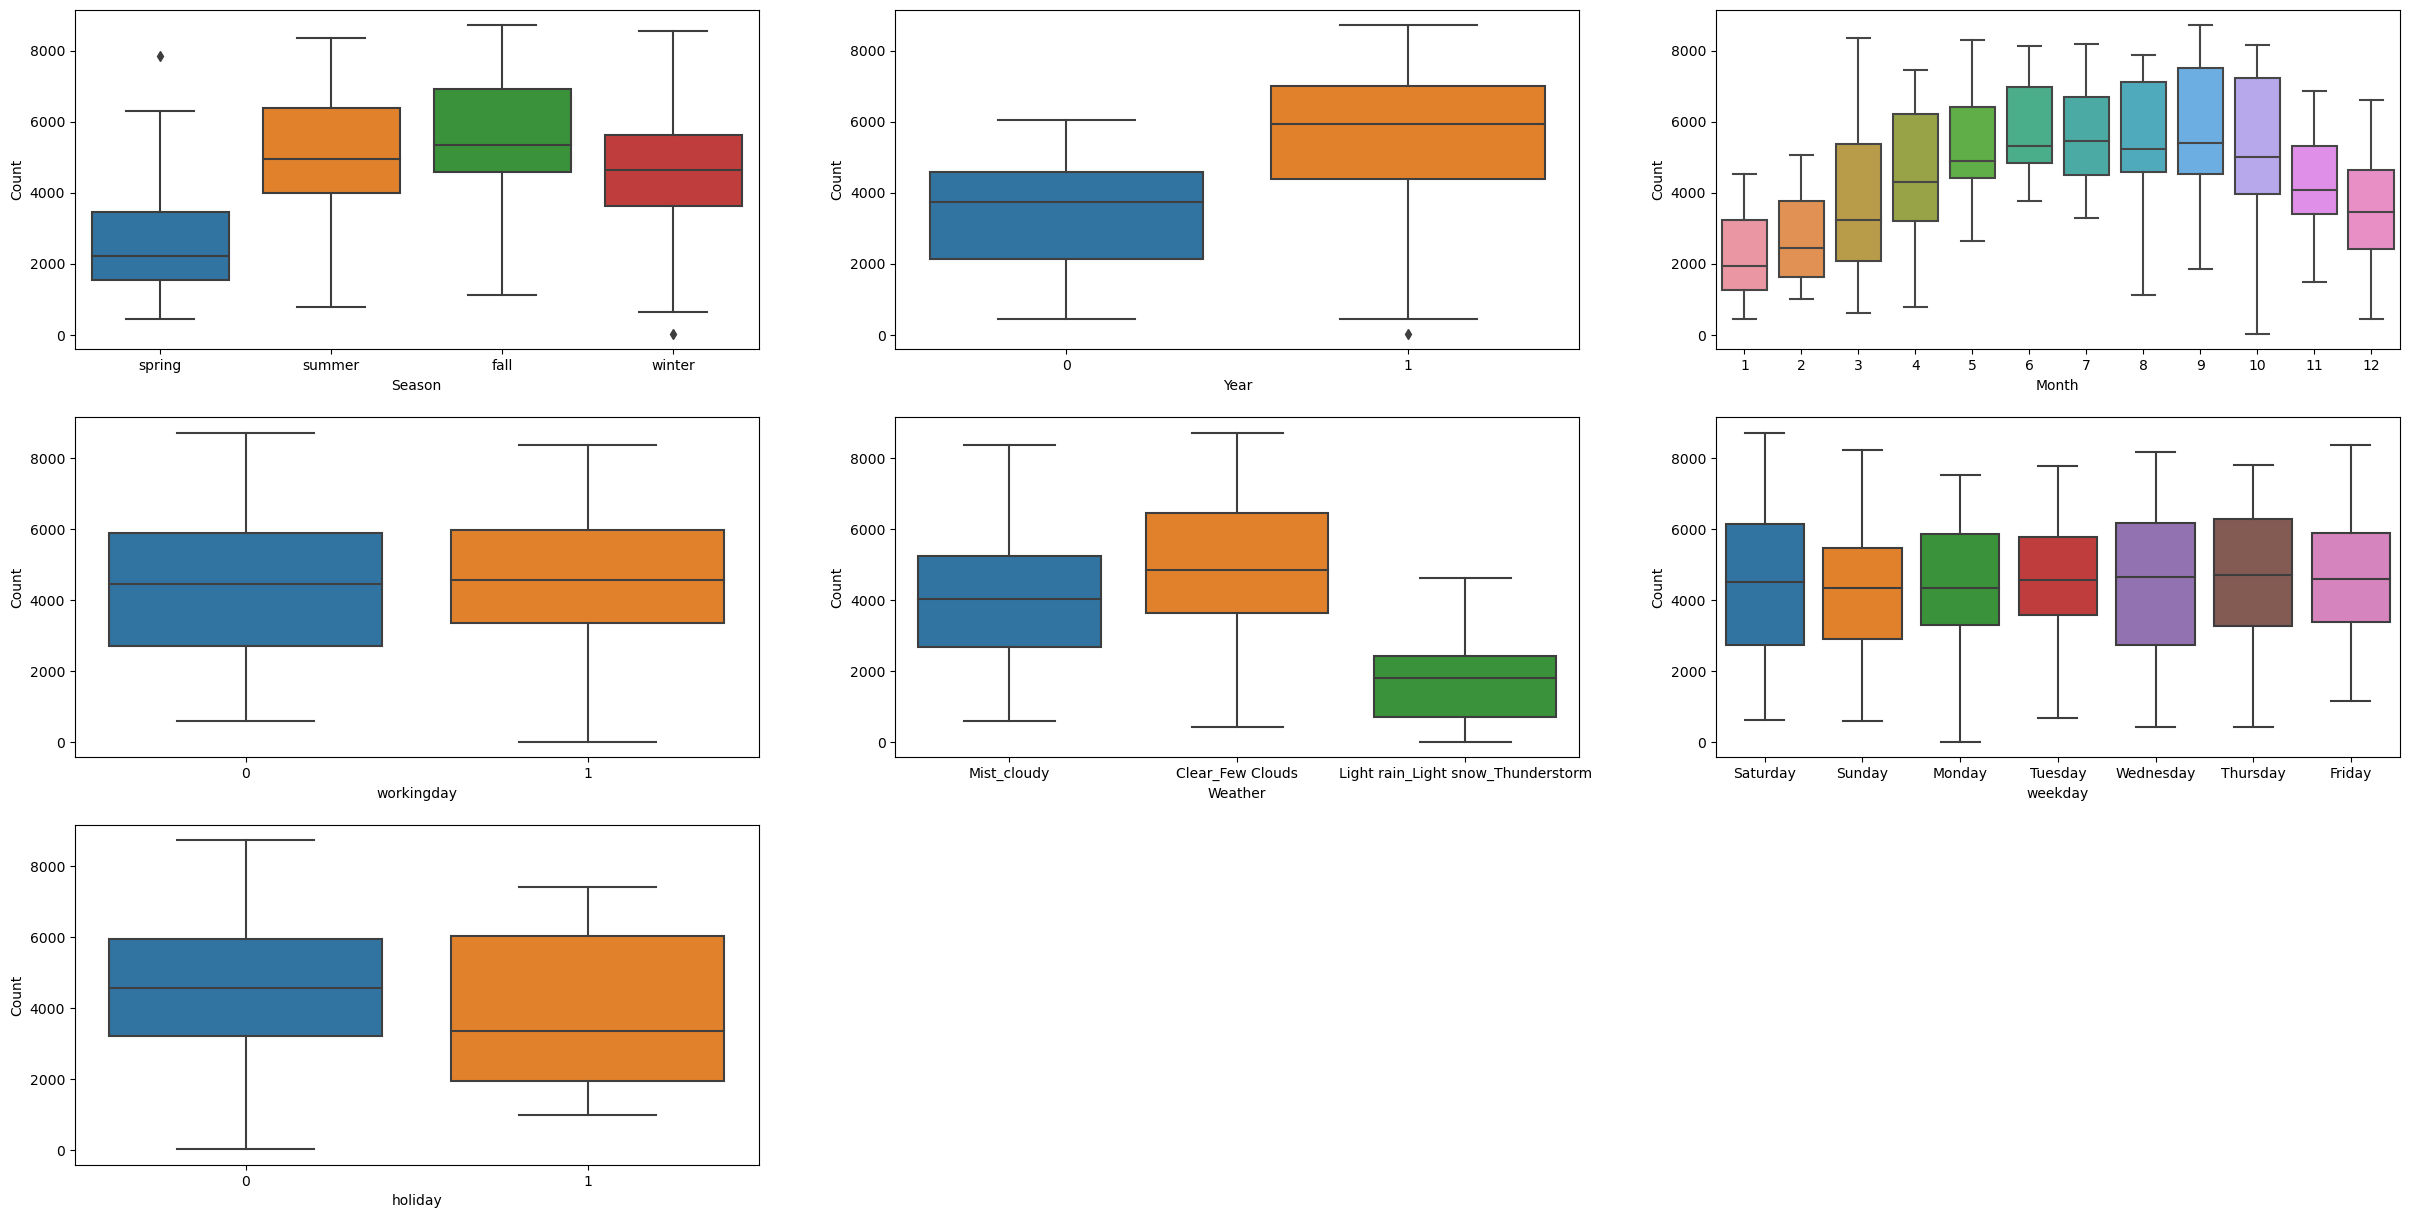

In [1069]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'Season', y = 'Count', data = bike)#yr','mnth','workingday','weathersit','weekday'
plt.subplot(3,3,2)
sns.boxplot(x = 'Year', y = 'Count', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'Month', y = 'Count', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'Count', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'Weather', y = 'Count', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'Count', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'Count', data = bike)
plt.show()

Step3: Creating dummy variables

In [1070]:
#Convert variables to object type
bike['Month']=bike['Month'].astype(object)
bike['Season']=bike['Season'].astype(object)
bike['Weather']=bike['Weather'].astype(object)
bike['weekday']=bike['weekday'].astype(object)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   Weather     730 non-null    object 
 7   atemp       730 non-null    float64
 8   Humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  Count       730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [1071]:
#CREATING DUMMY VARIABLES FOR CATEGORICAL DATA 

Season_condition=pd.get_dummies(bike['Season'],drop_first=True)
Weather_condition=pd.get_dummies(bike['Weather'],drop_first=True)
Day_of_week=pd.get_dummies(bike['weekday'],drop_first=True)
Month=pd.get_dummies(bike['Month'],drop_first=True)

In [1072]:
bike=pd.concat([bike,Season_condition],axis=1)
bike=pd.concat([bike,Weather_condition],axis=1)
bike=pd.concat([bike,Day_of_week],axis=1)
bike=pd.concat([bike,Month],axis=1)
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season                              730 non-null    object 
 1   Year                                730 non-null    int64  
 2   Month                               730 non-null    object 
 3   holiday                             730 non-null    int64  
 4   weekday                             730 non-null    object 
 5   workingday                          730 non-null    int64  
 6   Weather                             730 non-null    object 
 7   atemp                               730 non-null    float64
 8   Humidity                            730 non-null    float64
 9   windspeed                           730 non-null    float64
 10  Count                               730 non-null    int64  
 11  spring                              730 non-n

In [1073]:
#Deleting the orginal columns season.weathersit,weekday,mnth
bike.drop(['Season'],axis=1,inplace=True)
bike.drop(['Weather'],axis=1,inplace=True)

bike.drop(['weekday'],axis=1,inplace=True)

bike.drop(['Month'],axis=1,inplace=True)
bike.head()

,Year,holiday,workingday,atemp,Humidity,windspeed,Count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
0,0,0,0,18.18125,80.5833,10.749882,985,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,0,17.68695,69.6087,16.652113,801,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,1,9.47025,43.7273,16.636703,1349,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,1,10.60610,59.0435,10.739832,1562,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,1,11.46350,43.6957,12.522300,1600,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# Train - Test Split

In [1074]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1075]:
bike_train.head()

,Year,holiday,workingday,atemp,Humidity,windspeed,Count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,23.0423,55.8333,12.208807,7534,False,False,True,...,False,False,False,False,False,False,False,True,False,False
576,1,0,1,33.1448,70.4167,11.083475,7216,False,False,False,...,False,False,False,False,True,False,False,False,False,False
426,1,0,0,20.6746,62.1250,10.792293,4066,True,False,False,...,True,False,False,False,False,False,False,False,False,False
728,1,0,0,11.5850,48.3333,23.500518,1796,True,False,False,...,False,False,False,False,False,False,False,False,False,True
482,1,0,0,18.8752,48.9583,8.708325,4220,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [1076]:
bike_test.head()

,Year,holiday,workingday,atemp,Humidity,windspeed,Count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
184,0,1,0,33.27085,63.7917,5.459106,6043,False,False,False,...,False,False,False,False,True,False,False,False,False,False
535,1,0,1,36.04875,59.2083,7.625404,6211,False,True,False,...,False,False,False,True,False,False,False,False,False,False
299,0,0,1,22.85230,81.2917,13.250121,2659,False,False,True,...,False,False,False,False,False,False,False,True,False,False
221,0,0,1,34.24915,42.4167,13.417286,4780,False,False,False,...,False,False,False,False,False,True,False,False,False,False
152,0,0,1,32.19710,30.5000,19.583229,4968,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [1077]:
bike_train.columns

Index([                              'Year',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                 'Humidity',
                                'windspeed',
                                    'Count',
                                   'spring',
                                   'summer',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                   'Monday',
                                 'Saturday',
                                   'Sunday',
                                 'Thursday',
                                  'Tuesday',
                                'Wednesday',
                                          2,
                                          3,
                                          4,
                                          5,
          

In [1078]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [1079]:
num_vars=['atemp','Humidity','windspeed','Count']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [1080]:
bike_train.head()

,Year,holiday,workingday,atemp,Humidity,windspeed,Count,spring,summer,winter,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,0.864243,False,False,True,...,False,False,False,False,False,False,False,True,False,False
576,1,0,1,0.766351,0.725633,0.264686,0.827658,False,False,False,...,False,False,False,False,True,False,False,False,False,False
426,1,0,0,0.438975,0.640189,0.255342,0.465255,True,False,False,...,True,False,False,False,False,False,False,False,False,False
728,1,0,0,0.200348,0.498067,0.663106,0.204096,True,False,False,...,False,False,False,False,False,False,False,False,False,True
482,1,0,0,0.391735,0.504508,0.188475,0.482973,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [1081]:
bike_train.describe()

,Year,holiday,workingday,atemp,Humidity,windspeed,Count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1082]:
#CREATING X AND Y
y_train = bike_train.pop('Count')
X_train = bike_train

In [1083]:
X_train.head()

,Year,holiday,workingday,atemp,Humidity,windspeed,spring,summer,winter,Light rain_Light snow_Thunderstorm,...,3,4,5,6,7,8,9,10,11,12
653,1,0,1,0.501133,0.575354,0.300794,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
576,1,0,1,0.766351,0.725633,0.264686,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
426,1,0,0,0.438975,0.640189,0.255342,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
728,1,0,0,0.200348,0.498067,0.663106,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
482,1,0,0,0.391735,0.504508,0.188475,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False


In [1084]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: Count, dtype: float64

# model building

In [1085]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1086]:
lm = LinearRegression()
lm.fit(X_train.values, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)            
rfe = rfe.fit(X_train.values, y_train)

In [1087]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 11),
 ('Saturday', False, 3),
 ('Sunday', False, 10),
 ('Thursday', False, 13),
 ('Tuesday', False, 12),
 ('Wednesday', False, 14),
 (2, False, 5),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 6),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 8),
 (12, False, 9)]

In [1088]:
col = X_train.columns[rfe.support_]
col

Index([                              'Year',
                                  'holiday',
                                    'atemp',
                                 'Humidity',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [1089]:
X_train.columns[~rfe.support_]

Index(['workingday',     'summer',     'Monday',   'Saturday',     'Sunday',
         'Thursday',    'Tuesday',  'Wednesday',            2,            7,
                 10,           11,           12],
      dtype='object')

In [1090]:
X_train_rfe = X_train[col].astype(np.float64)

In [1091]:
import statsmodels.api as sms  
X_train_rfe1 = sms.add_constant(X_train_rfe)

In [1092]:
lm = sms.OLS(y_train,X_train_rfe1).fit()

In [1093]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     173.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          8.06e-186
Time:                        06:27:36   Log-Likelihood:                 506.64
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     494   BIC:                            -913.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1094]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,25.72
2,atemp,15.52
4,windspeed,4.56
5,spring,3.52
6,winter,3.21
8,Mist_cloudy,2.26
0,Year,2.08
13,8,1.90
11,5,1.77
10,4,1.68


In [1095]:
X_train_rfe1.head()

,const,Year,holiday,atemp,Humidity,windspeed,spring,winter,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,4,5,6,8,9
653,1.0,1.0,0.0,0.501133,0.575354,0.300794,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
576,1.0,1.0,0.0,0.766351,0.725633,0.264686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
426,1.0,1.0,0.0,0.438975,0.640189,0.255342,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
728,1.0,1.0,0.0,0.200348,0.498067,0.663106,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,1.0,0.0,0.391735,0.504508,0.188475,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [1096]:
X_train_rfe=X_train_rfe.drop(['Humidity'],axis=1)

In [1097]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [1098]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()

In [1099]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     178.8
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.75e-183
Time:                        06:27:46   Log-Likelihood:                 497.88
No. Observations:                 510   AIC:                            -965.8
Df Residuals:                     495   BIC:                            -902.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.26
3,windspeed,4.56
4,spring,2.10
0,Year,2.08
5,winter,1.97
12,8,1.86
11,6,1.64
10,5,1.60
7,Mist_cloudy,1.55
9,4,1.54


In [1101]:
X_train_rfe=X_train_rfe.drop(['atemp'],axis=1)

In [1102]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     134.4
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.90e-153
Time:                        06:27:50   Log-Likelihood:                 423.38
No. Observations:                 510   AIC:                            -818.8
Df Residuals:                     496   BIC:                            -759.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1103]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
3,spring,2.10
0,Year,1.90
4,winter,1.80
6,Mist_cloudy,1.54
8,4,1.48
9,5,1.32
7,3,1.31
11,8,1.31
10,6,1.24


In [1104]:
X_train_rfe.columns

Index([                              'Year',
                                  'holiday',
                                'windspeed',
                                   'spring',
                                   'winter',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          4,
                                          5,
                                          6,
                                          8,
                                          9],
      dtype='object')

In [1105]:
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [1106]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     134.9
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          9.96e-148
Time:                        06:27:54   Log-Likelihood:                 407.93
No. Observations:                 510   AIC:                            -789.9
Df Residuals:                     497   BIC:                            -734.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1107]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,1.85
5,Mist_cloudy,1.53
2,spring,1.48
3,winter,1.39
6,3,1.23
10,8,1.17
7,4,1.14
8,5,1.14
11,9,1.12
9,6,1.08


In [1108]:
#Winter has A VERY HIGH p-value WHUCH MEANS IT IS insignificant SO WE DROP IT
X_train_rfe=X_train_rfe.drop(['winter'],axis=1)

In [1109]:
X_train_rfe4 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     147.4
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          9.28e-149
Time:                        06:27:56   Log-Likelihood:                 407.78
No. Observations:                 510   AIC:                            -791.6
Df Residuals:                     498   BIC:                            -740.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1110]:
#cOLUMN 4 HAS A VERY HIGH p-value WHUCH MEANS IT IS insignificant SO WE DROP IT
X_train_rfe=X_train_rfe.drop([4],axis=1)

In [1111]:
X_train_rfe5 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     161.3
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.76e-149
Time:                        06:27:58   Log-Likelihood:                 406.38
No. Observations:                 510   AIC:                            -790.8
Df Residuals:                     499   BIC:                            -744.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1112]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,1.51
2,spring,1.39
4,Mist_cloudy,1.36
5,3,1.22
8,8,1.12
6,5,1.10
9,9,1.10
7,6,1.06
1,holiday,1.03
3,Light rain_Light snow_Thunderstorm,1.02


In [1113]:
X_train_rfe['Saturday']=X_train['Saturday']
X_train_rfe.head()

,Year,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Saturday
653,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
576,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
426,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,True
728,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
482,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,True


In [1115]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6.astype(float)).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     146.6
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.47e-148
Time:                        06:31:12   Log-Likelihood:                 406.77
No. Observations:                 510   AIC:                            -789.5
Df Residuals:                     498   BIC:                            -738.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1116]:
#Saturday has high p-value so we drop it
X_train_rfe=X_train_rfe.drop(['Saturday'],axis=1)

In [1121]:
X_train_rfe7 = sm.add_constant(X_train_rfe)
lm7 = sm.OLS(y_train,X_train_rfe7.astype(float)).fit()
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.81e-150
Time:                        06:32:57   Log-Likelihood:                 411.83
No. Observations:                 510   AIC:                            -799.7
Df Residuals:                     498   BIC:                            -748.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1125]:
vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,1.54
2,spring,1.41
4,Mist_cloudy,1.37
5,3,1.23
8,8,1.12
9,9,1.11
10,Sunday,1.11
6,5,1.10
7,6,1.07
1,holiday,1.03


In [1126]:
#ADDING SUNDAY TO CHECK IF MODEL IMPROVES
X_train_rfe['Sunday']=X_train['Sunday']
X_train_rfe.head()

,Year,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday
653,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
576,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
426,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,False
728,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
482,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False


In [1128]:
X_train_rfe8 = sm.add_constant(X_train_rfe)
lm8 = sm.OLS(y_train,X_train_rfe8.astype(float)).fit()
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.81e-150
Time:                        06:36:10   Log-Likelihood:                 411.83
No. Observations:                 510   AIC:                            -799.7
Df Residuals:                     498   BIC:                            -748.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1130]:
vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,1.54
2,spring,1.41
4,Mist_cloudy,1.37
5,3,1.23
8,8,1.12
9,9,1.11
10,Sunday,1.11
6,5,1.10
7,6,1.07
1,holiday,1.03


In [1131]:
#ADDING WORKING DAY TO CHECK IF MODEL IMPROVES
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,Year,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,workingday
653,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1
576,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,1
426,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,False,0
728,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,0
482,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,0


In [1133]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9.astype(float)).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.7
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.18e-149
Time:                        06:37:31   Log-Likelihood:                 411.87
No. Observations:                 510   AIC:                            -797.7
Df Residuals:                     497   BIC:                            -742.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1134]:
X_train_rfe=X_train_rfe.drop(['workingday'],axis=1)

In [1136]:
X_train_rfe10 = sm.add_constant(X_train_rfe)
lm10 = sm.OLS(y_train,X_train_rfe10.astype(float)).fit()
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.81e-150
Time:                        06:38:12   Log-Likelihood:                 411.83
No. Observations:                 510   AIC:                            -799.7
Df Residuals:                     498   BIC:                            -748.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1138]:
vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,1.54
2,spring,1.41
4,Mist_cloudy,1.37
5,3,1.23
8,8,1.12
9,9,1.11
10,Sunday,1.11
6,5,1.10
7,6,1.07
1,holiday,1.03


# Add month model

In [1139]:
#ADDING MONTH 2 TO CHECK IF MODEL IMPROVES
X_train_rfe[2]=X_train[2]
X_train_rfe.head()

,Year,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,2
653,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
576,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
426,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,False,False
728,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
482,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,False


In [1141]:
X_train_rfe11 = sm.add_constant(X_train_rfe)
lm11 = sm.OLS(y_train,X_train_rfe11.astype(float)).fit()
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     137.7
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.06e-149
Time:                        06:40:27   Log-Likelihood:                 411.93
No. Observations:                 510   AIC:                            -797.9
Df Residuals:                     497   BIC:                            -742.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1142]:
X_train_rfe=X_train_rfe.drop([2],axis=1)

In [1144]:
X_train_rfe12 = sm.add_constant(X_train_rfe)
lm12 = sm.OLS(y_train,X_train_rfe12.astype(float)).fit()
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     150.5
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.81e-150
Time:                        06:41:12   Log-Likelihood:                 411.83
No. Observations:                 510   AIC:                            -799.7
Df Residuals:                     498   BIC:                            -748.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1145]:
vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,1.54
2,spring,1.41
4,Mist_cloudy,1.37
5,3,1.23
8,8,1.12
9,9,1.11
10,Sunday,1.11
6,5,1.10
7,6,1.07
1,holiday,1.03


In [1146]:
X_train_rfe[7]=X_train[7]
X_train_rfe.head()

,Year,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7
653,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False
576,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True
426,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,False,False
728,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False
482,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,False


In [1147]:
X_train_rfe13 = sm.add_constant(X_train_rfe)
lm13 = sm.OLS(y_train,X_train_rfe13.astype(float)).fit()
print(lm13.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     146.8
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          1.03e-154
Time:                        06:42:22   Log-Likelihood:                 424.54
No. Observations:                 510   AIC:                            -823.1
Df Residuals:                     497   BIC:                            -768.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1149]:
vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,1.62
2,spring,1.42
4,Mist_cloudy,1.37
5,3,1.23
8,8,1.13
10,Sunday,1.12
6,5,1.11
9,9,1.11
11,7,1.08
7,6,1.07


It hass improved  in month 7 so we can keep in month 7

In [1151]:
#ADDING MONTH 10 TO CHECK IF MODEL IMPROVES
X_train_rfe[10]=X_train[10].astype(float)
X_train_rfe.head()

,Year,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10
653,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,1.0
576,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0.0
426,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,False,False,0.0
728,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,0.0
482,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,False,0.0


In [1152]:
X_train_rfe14 = sm.add_constant(X_train_rfe)
lm14 = sm.OLS(y_train,X_train_rfe14.astype(float)).fit()
print(lm14.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.24e-162
Time:                        06:45:14   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1153]:
vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,1.68
2,spring,1.45
4,Mist_cloudy,1.41
5,3,1.23
12,10,1.17
8,8,1.14
10,Sunday,1.14
9,9,1.13
6,5,1.12
11,7,1.09


In [1154]:
#ADDING MONTH 11 TO CHECK IF MODEL IMPROVES
X_train_rfe[11]=X_train[11]
X_train_rfe.head()

,Year,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10,11
653,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,1.0,False
576,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0.0,False
426,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,False,False,0.0,False
728,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,0.0,False
482,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,False,0.0,False


In [1155]:
X_train_rfe15 = sm.add_constant(X_train_rfe)
lm15 = sm.OLS(y_train,X_train_rfe15.astype(float)).fit()
print(lm15.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.0
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.70e-161
Time:                        06:46:32   Log-Likelihood:                 445.42
No. Observations:                 510   AIC:                            -860.8
Df Residuals:                     495   BIC:                            -797.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1156]:
X_train_rfe=X_train_rfe.drop([11],axis=1)

In [1158]:
X_train_rfe16= sm.add_constant(X_train_rfe)
lm16 = sm.OLS(y_train,X_train_rfe16.astype(float)).fit()
print(lm16.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          3.24e-162
Time:                        06:47:10   Log-Likelihood:                 445.00
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     496   BIC:                            -802.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [1159]:
vif = pd.DataFrame()
X = X_train_rfe.astype(float)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Year,1.68
2,spring,1.45
4,Mist_cloudy,1.41
5,3,1.23
12,10,1.17
8,8,1.14
10,Sunday,1.14
9,9,1.13
6,5,1.12
11,7,1.09


We have considered all columns and checked.Now can we choose
Out all the models model lm14 seems to give good result so we choose it.

# Error terms

In [1160]:
y_train_cnt = lm14.predict(X_train_rfe14)

In [1161]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1162]:
res=y_train - y_train_cnt

Text(0.5, 0, 'Errors')

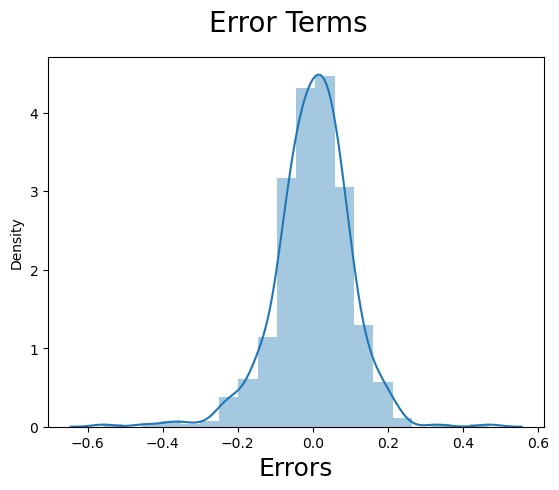

In [1163]:
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [1164]:
X_train_rfe14.columns

Index([                             'const',
                                     'Year',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                   'Sunday',
                                          7,
                                         10],
      dtype='object')

In [1168]:
num_vars=['atemp','Humidity','windspeed','Count']
bike_test[num_vars] = scaler.fit_transform(bike_test[num_vars])

In [1169]:

y_test = bike_test.pop('Count')
X_test = bike_test

In [1170]:
X_train_new=X_train_rfe14.drop(['const'], axis=1)

In [1171]:
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1172]:
X_train_rfe14.columns

Index([                             'const',
                                     'Year',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                   'Sunday',
                                          7,
                                         10],
      dtype='object')

In [1173]:
y_pred = lm14.predict(X_test_new)

Text(0, 0.5, 'y_pred')

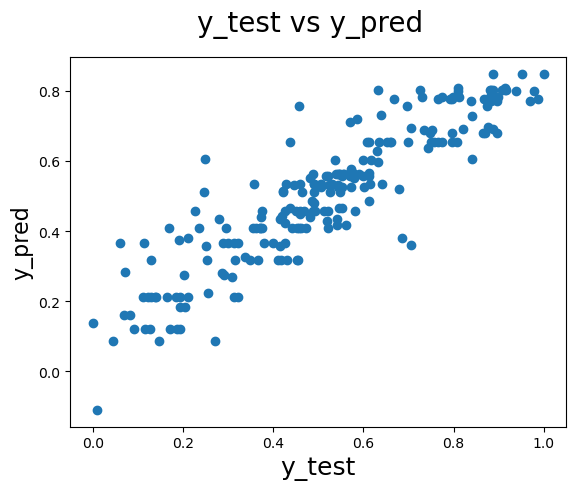

In [1174]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)           

We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [1175]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [1176]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.10573120032920406

In [1177]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.8029017439604782

In [1178]:
X_t=X_train_new.iloc[:,0].values

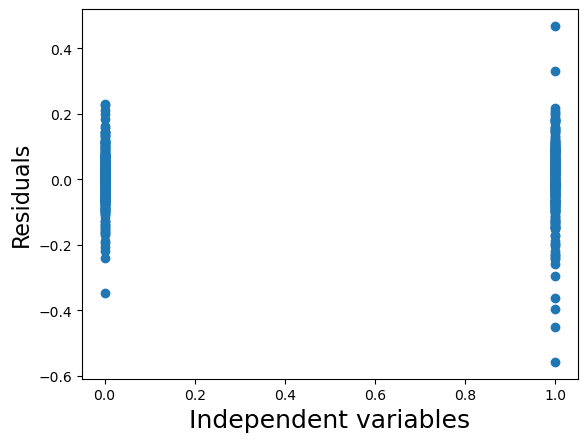

In [1179]:
plt.figure()
plt.scatter(X_t,res)
fig.suptitle('Independent vars vs res', fontsize=20)              # Plot heading 
plt.xlabel('Independent variables', fontsize=18)                          # X-label
plt.ylabel('Residuals', fontsize=16)  
plt.show()

the regression is likely to suffer from autocorrelation because demand next year will certainly be dependent on demand this year. Hence, error terms in different observations will surely be correlated with each other.

In [1180]:
X_train_new.head()

,Year,holiday,spring,Light rain_Light snow_Thunderstorm,Mist_cloudy,3,5,6,8,9,Sunday,7,10
653,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,False,1.0
576,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,True,0.0
426,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,False,False,0.0
728,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,0.0
482,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,False,False,0.0


In [1181]:
print(X_train_rfe14.columns)
print(lm14.summary())

Index([                             'const',
                                     'Year',
                                  'holiday',
                                   'spring',
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                          3,
                                          5,
                                          6,
                                          8,
                                          9,
                                   'Sunday',
                                          7,
                                         10],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 14 Fe

Final recommendations for the company: Demand is higher in month of 3, 5 , 6, 8, 9 ,7 and 10